In [1]:
import numpy as np
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

from utils import plot_2d_visualization

np.random.seed(0)

In [2]:
# prep data

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(int)

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

indices = np.random.choice(len(X), 6000, replace=False)
X_subset = X_pca[indices]
y_subset = y[indices]

/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
from sammon import sammon

X_sammon, _ = sammon(X_subset, 2, maxiter=5, maxhalves=2)

epoch = 1 : E = 179.5260545955
epoch = 2 : E = 2779.7117366285
epoch = 3 : E = 2.3195384981
epoch = 4 : E = 0.7703570913
epoch = 5 : E = 49.0277361619


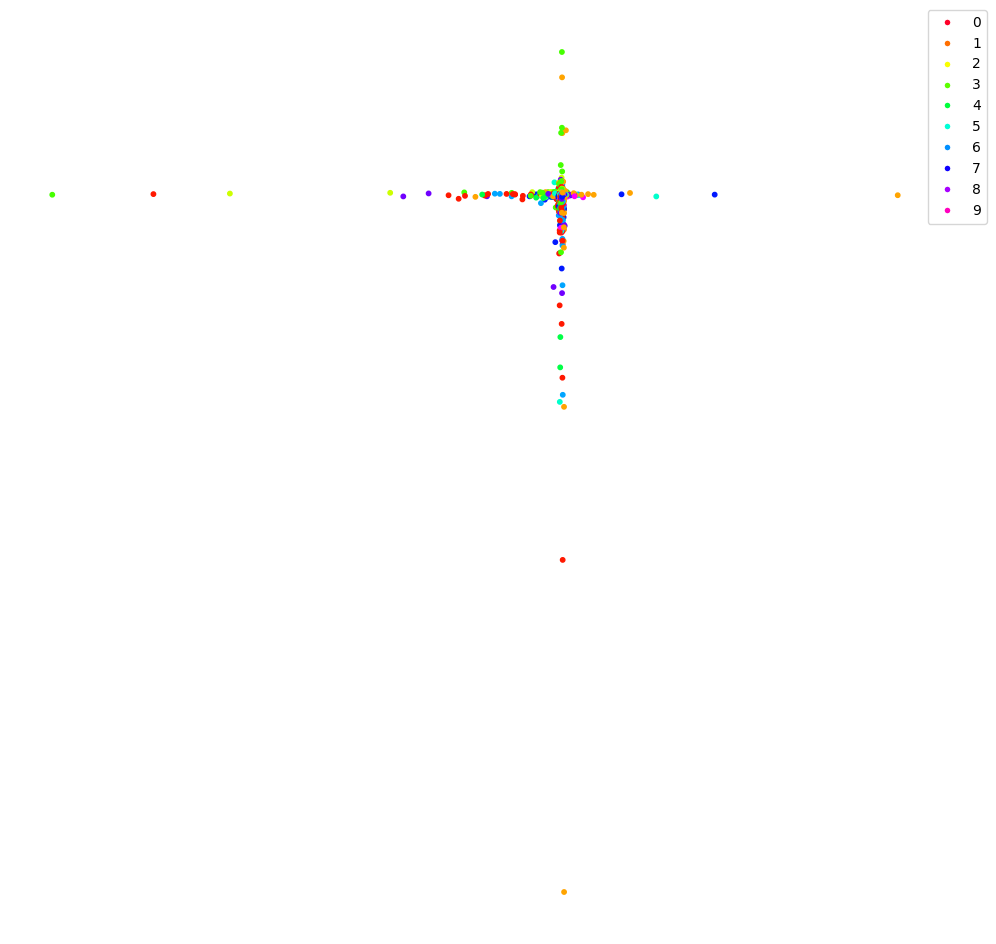

In [11]:
plot_2d_visualization(X_sammon, y_subset, 'sammon_MNIST.png')

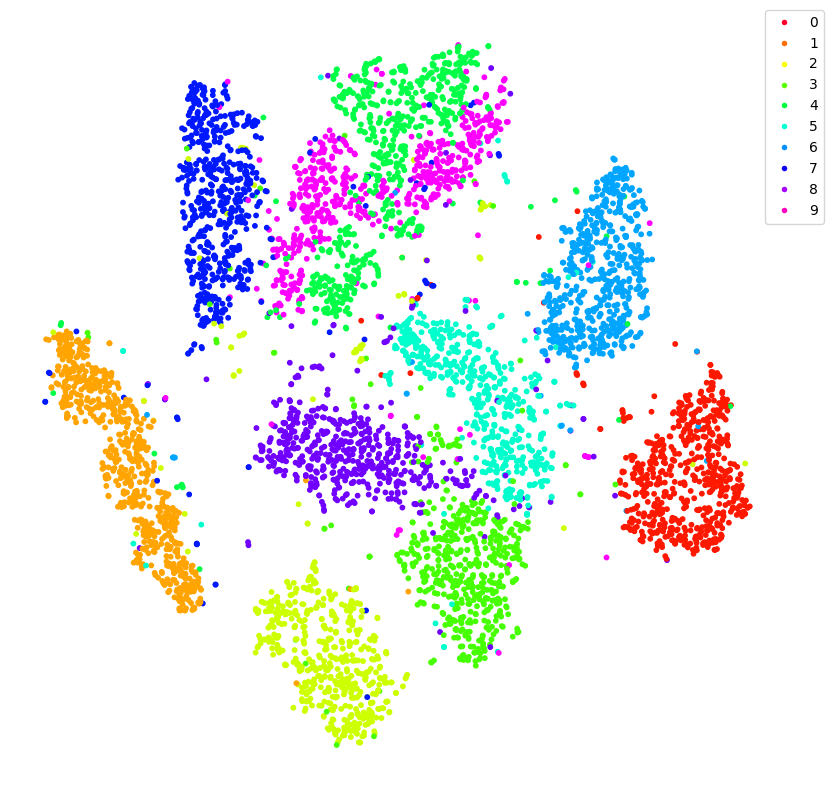

In [3]:
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_subset)

plot_2d_visualization(X_tsne, y_subset, 't-SNE_MNIST.png')

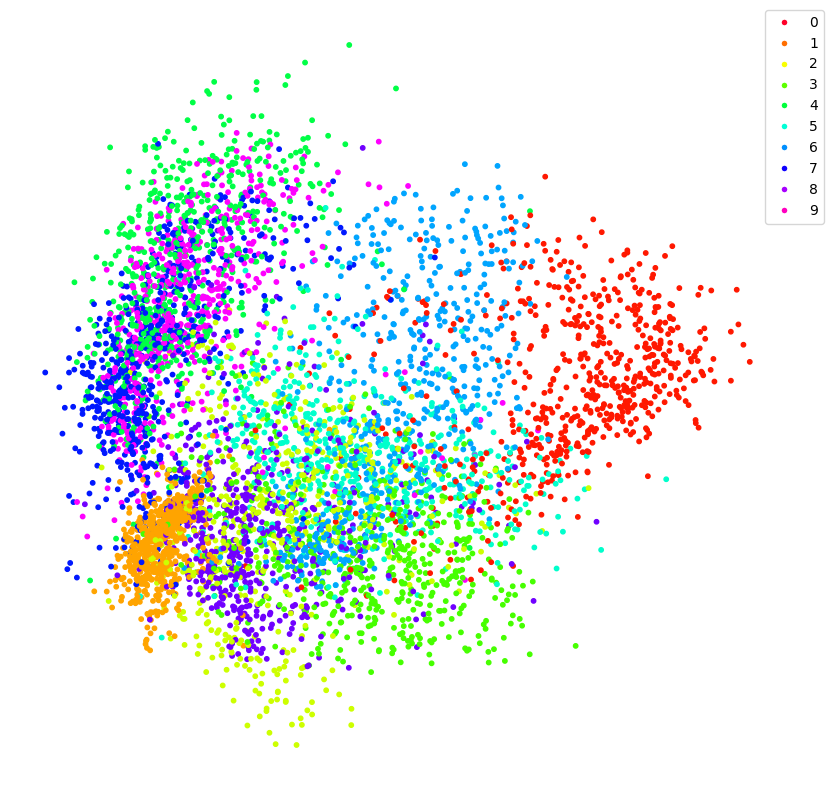

In [4]:
isomap = Isomap(n_components=2, n_neighbors=12)
X_isomap = isomap.fit_transform(X_subset)

plot_2d_visualization(X_isomap, y_subset, 'Isomap_MNIST.png')

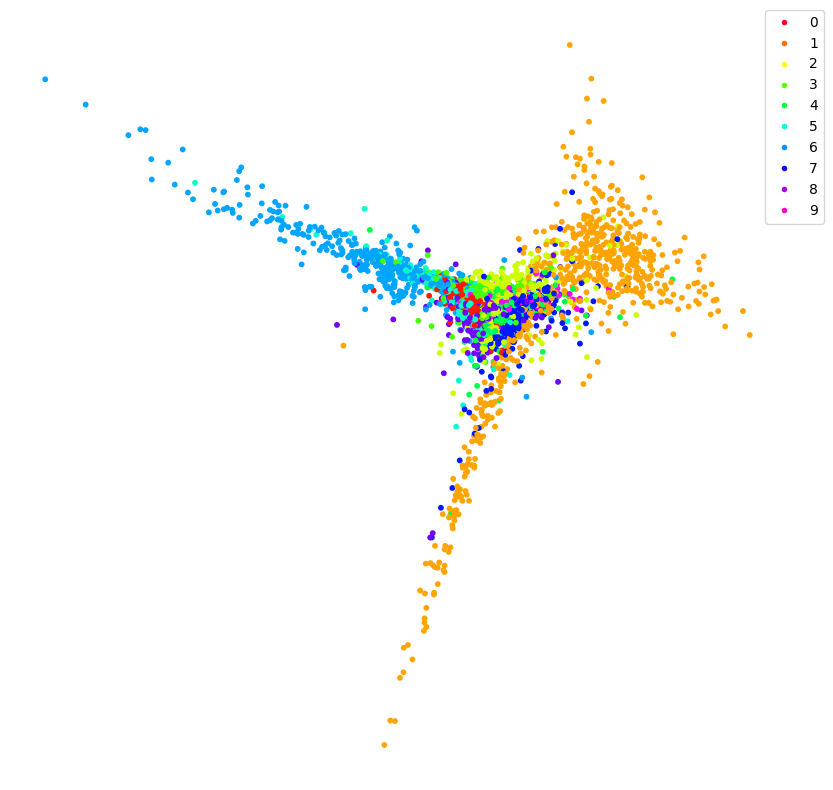

In [5]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_lle = lle.fit_transform(X_subset)

plot_2d_visualization(X_lle, y_subset, 'LLE_MNIST.png')